Successfully loaded data from data/test_data.xlsx
OPTIMAL MANPOWER ASSIGNMENT REPORT
Total Assignment Cost: -11.80
------------------------------------------------------------
OPTIMAL ASSIGNMENTS:
------------------------------------------------------------
Worker: Worker_0
  → Task: Task_5
  → Cost: 1.20
  → Hours: 8
  → Skill Matching:
     - Assembly: Required=4, Worker=4 (MATCH)
     - Packaging: Required=3, Worker=4 (MATCH)
  → Cost Breakdown:
     - Availability: 0.00 × 0.20 = 0.00
     - Skill: -2.50 × 0.40 = -1.00
     - Workhours: 3.00 × 0.20 = 0.60
     - Complexity: 8.00 × 0.20 = 1.60
----------------------------------------
Worker: Worker_1
  → Task: Task_7
  → Cost: 0.60
  → Hours: 7
  → Skill Matching:
     - Quality Control: Required=3, Worker=4 (MATCH)
     - Sorting: Required=4, Worker=4 (MATCH)
  → Cost Breakdown:
     - Availability: 0.00 × 0.20 = 0.00
     - Skill: -2.50 × 0.40 = -1.00
     - Workhours: 2.00 × 0.20 = 0.40
     - Complexity: 6.00 × 0.20 = 1.20
------

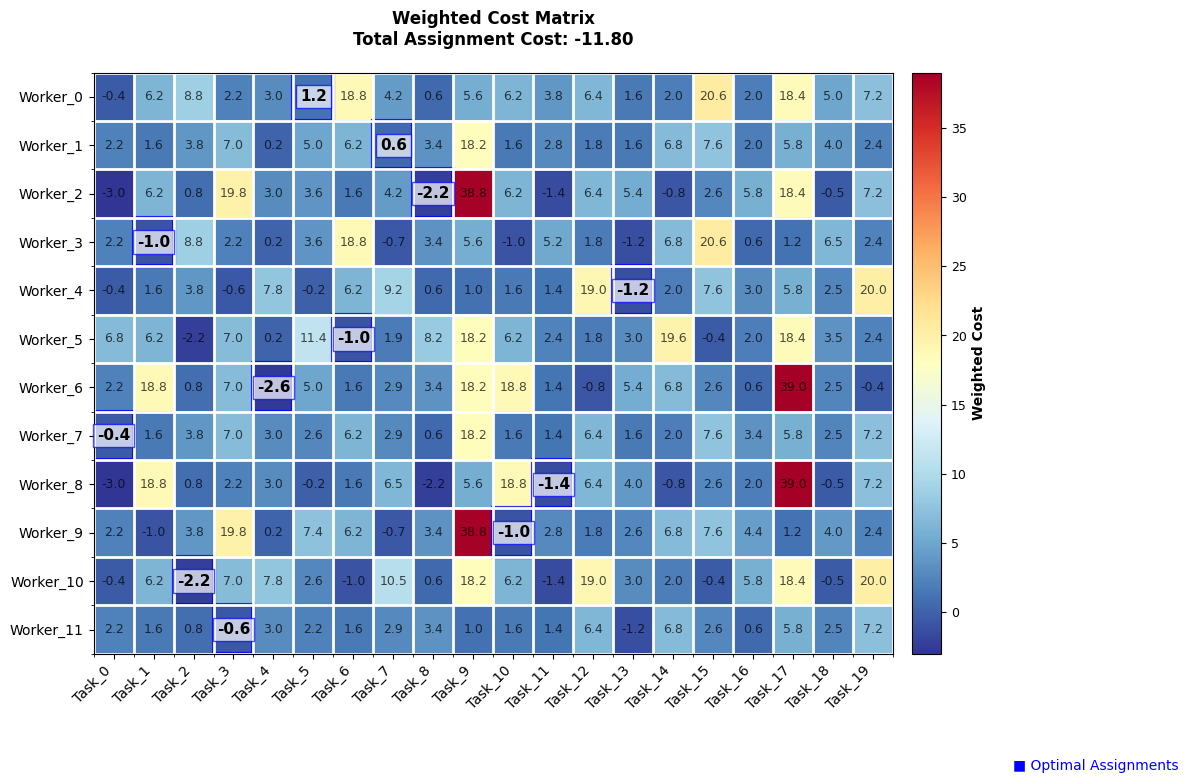

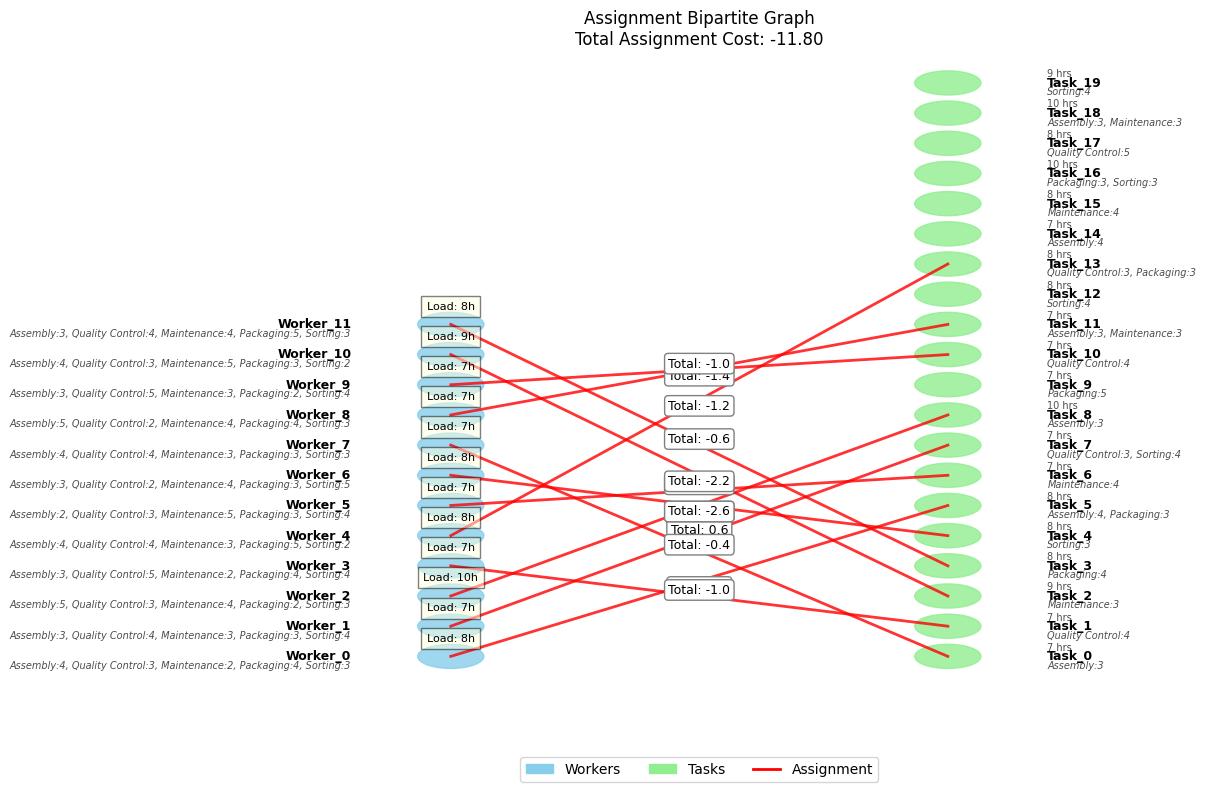

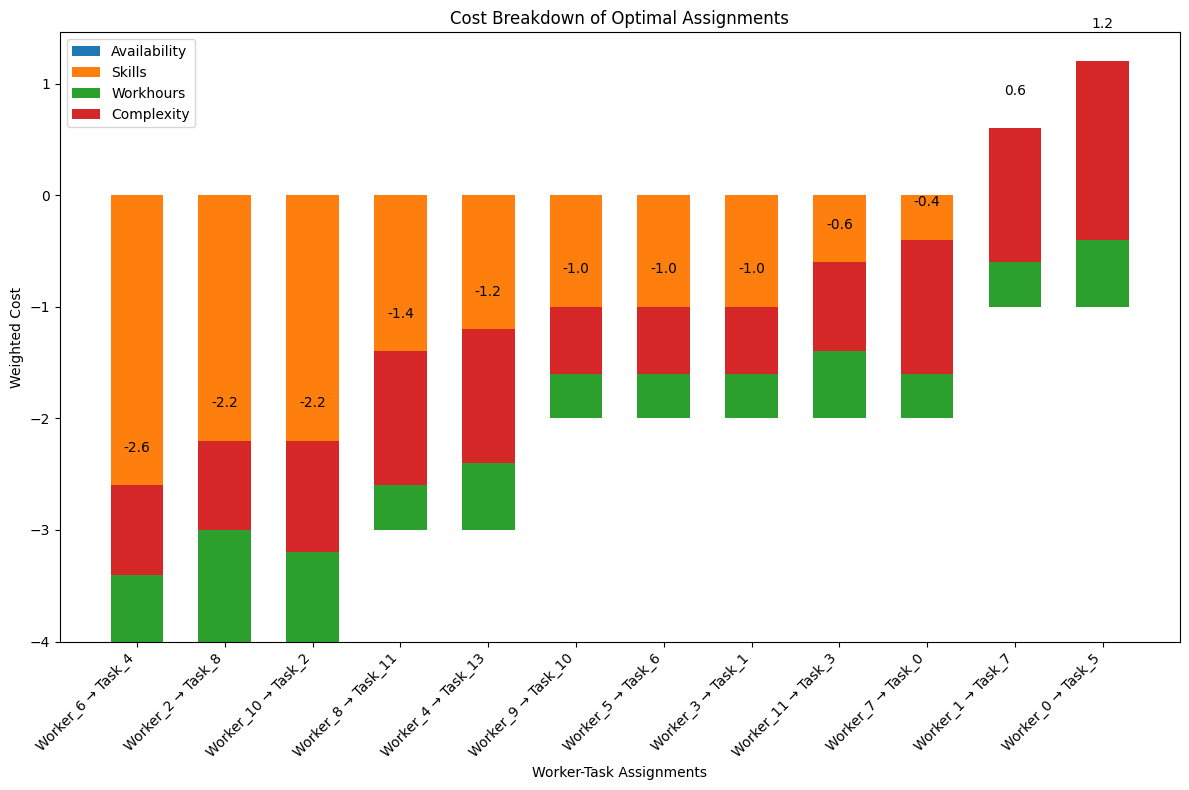

In [4]:
from optimiser import WeightedHungarianOptimizer
import pandas as pd
import os

"""Demonstrate usage with a production center scenario loaded from Excel file:
   12 workers and 20 tasks typical of a factory production center.
"""

# Path to the Excel file containing our assignment data
file_path = "data/test_data.xlsx"

# Check if file exists or error
if not os.path.exists(file_path):
    print("Error: The specified Excel file does not exist.")
    exit(1)


# Create optimizer and load data from Excel file
optimizer = WeightedHungarianOptimizer()
optimizer.load_data_from_excel(file_path)

# Set custom weights for this production center scenario
optimizer.set_weights({
    "availability": 0.2,
    "skill": 0.4,
    "workhours": 0.2,
    "complexity": 0.2
})

# Optimize assignment
assignment, total_cost = optimizer.optimize()

# Generate and display detailed results and visualizations
optimizer.generate_report()
optimizer.visualize_cost_matrix()
optimizer.visualize_bipartite_graph()
optimizer.visualize_cost_breakdown()